=== Logistic Regression Educational Demo ===

1. Generating sample dataset...
   Training samples: 800
   Test samples: 200
   Features: 2

2. Training the model...
   Final weights: [-0.25318706  3.22944195]
   Final bias: 0.6311

3. Making predictions...
   Training accuracy: 90.12%
   Test accuracy: 90.00%


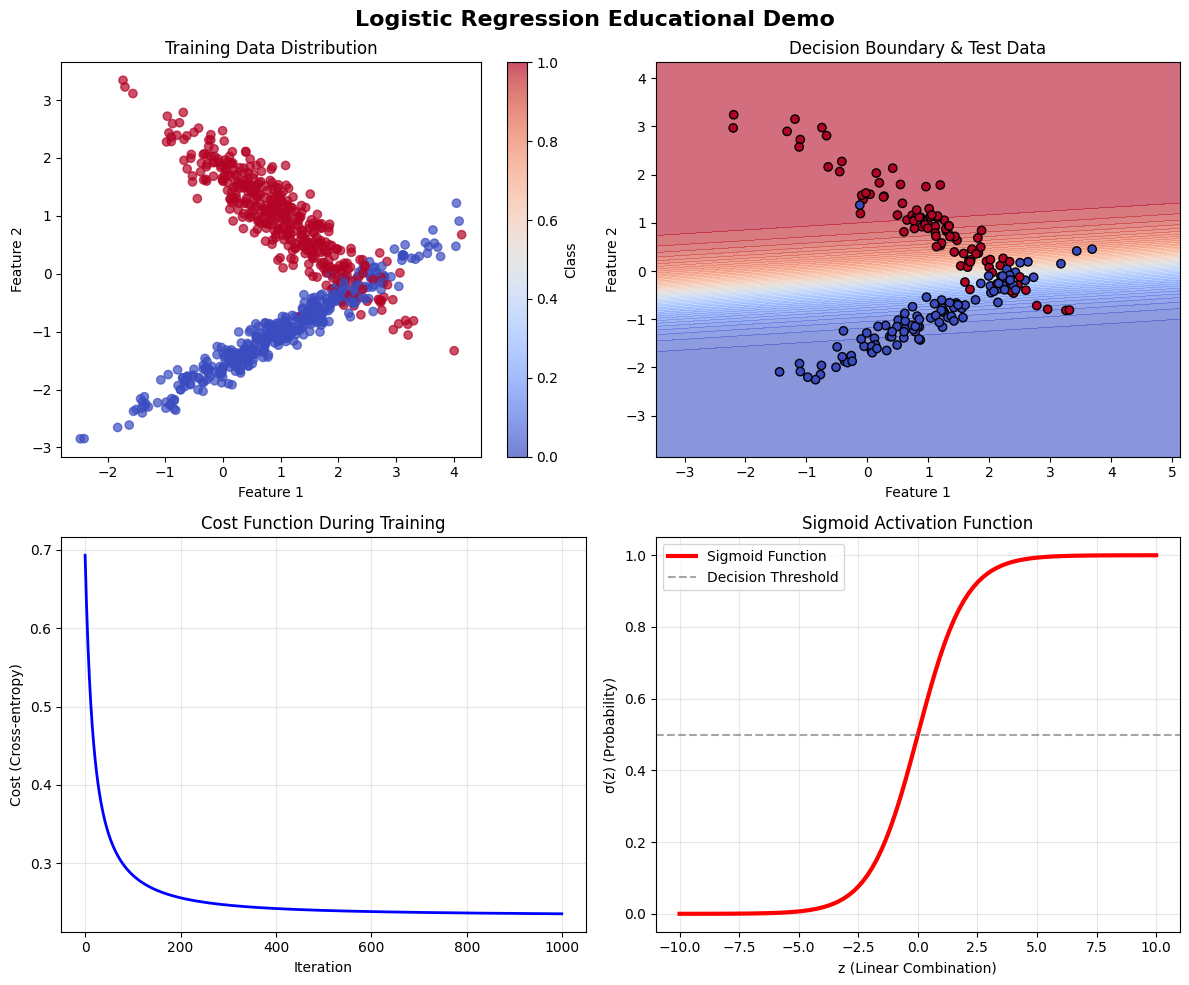


=== Key Learning Points ===
• Sigmoid function maps linear outputs to probabilities (0-1)
• Cost function measures how well our model fits the data
• Gradient descent iteratively improves model parameters
• Decision boundary separates classes in feature space
• Model learns optimal weights and bias through training

=== Example Prediction ===
New sample: [ 1.5 -0.5]
Predicted probability: 0.2037
Predicted class: 0 (Negative)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

class SimpleLogisticRegression:
    """
    A simple implementation of Logistic Regression for educational purposes.
    
    This class demonstrates the core concepts of logistic regression including:
    - Sigmoid function
    - Cost function (log-likelihood)
    - Gradient descent optimization
    """
    
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None
        self.costs = []
    
    def sigmoid(self, z):
        """
        Sigmoid activation function: 1 / (1 + e^(-z))
        Maps any real number to a value between 0 and 1
        """
        # Clip z to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """
        Train the logistic regression model using gradient descent
        
        Parameters:
        X: Training features (n_samples, n_features)
        y: Training labels (n_samples,)
        """
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for i in range(self.max_iterations):
            # Forward pass: compute predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            # Compute cost (log-likelihood)
            cost = self.compute_cost(y, y_predicted)
            self.costs.append(cost)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def compute_cost(self, y_true, y_pred):
        """
        Compute the logistic regression cost function (cross-entropy loss)
        """
        # Avoid log(0) by adding small epsilon
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        cost = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return cost
    
    def predict(self, X):
        """
        Make predictions on new data
        """
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        predictions = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(predictions)
    
    def predict_proba(self, X):
        """
        Return prediction probabilities
        """
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

# Demo: Create and train the model
print("=== Logistic Regression Educational Demo ===\n")

# 1. Generate sample data
print("1. Generating sample dataset...")
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"   Training samples: {X_train.shape[0]}")
print(f"   Test samples: {X_test.shape[0]}")
print(f"   Features: {X_train.shape[1]}")

# 2. Create and train the model
print("\n2. Training the model...")
model = SimpleLogisticRegression(learning_rate=0.1, max_iterations=1000)
model.fit(X_train, y_train)

print(f"   Final weights: {model.weights}")
print(f"   Final bias: {model.bias:.4f}")

# 3. Make predictions
print("\n3. Making predictions...")
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracy
train_accuracy = np.mean(train_predictions == y_train) * 100
test_accuracy = np.mean(test_predictions == y_test) * 100

print(f"   Training accuracy: {train_accuracy:.2f}%")
print(f"   Test accuracy: {test_accuracy:.2f}%")

# 4. Visualize results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Logistic Regression Educational Demo', fontsize=16, fontweight='bold')

# Plot 1: Original data
scatter = ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
ax1.set_title('Training Data Distribution')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
plt.colorbar(scatter, ax=ax1, label='Class')

# Plot 2: Decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict_proba(mesh_points)
Z = Z.reshape(xx.shape)

ax2.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='coolwarm')
scatter2 = ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='black')
ax2.set_title('Decision Boundary & Test Data')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

# Plot 3: Cost function over iterations
ax3.plot(model.costs, 'b-', linewidth=2)
ax3.set_title('Cost Function During Training')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Cost (Cross-entropy)')
ax3.grid(True, alpha=0.3)

# Plot 4: Sigmoid function
z_values = np.linspace(-10, 10, 100)
sigmoid_values = model.sigmoid(z_values)
ax4.plot(z_values, sigmoid_values, 'r-', linewidth=3, label='Sigmoid Function')
ax4.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, label='Decision Threshold')
ax4.set_title('Sigmoid Activation Function')
ax4.set_xlabel('z (Linear Combination)')
ax4.set_ylabel('σ(z) (Probability)')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

print("\n=== Key Learning Points ===")
print("• Sigmoid function maps linear outputs to probabilities (0-1)")
print("• Cost function measures how well our model fits the data")
print("• Gradient descent iteratively improves model parameters")
print("• Decision boundary separates classes in feature space")
print("• Model learns optimal weights and bias through training")

# Demonstrate prediction on new sample
print(f"\n=== Example Prediction ===")
sample_point = np.array([[1.5, -0.5]])
probability = model.predict_proba(sample_point)[0]
prediction = model.predict(sample_point)[0]
print(f"New sample: {sample_point[0]}")
print(f"Predicted probability: {probability:.4f}")
print(f"Predicted class: {prediction} ({'Positive' if prediction == 1 else 'Negative'})")